<a href="https://colab.research.google.com/github/akhila0125-ai/greatlearning/blob/main/PYF_Project_LearnerNotebook_FullCode_AkhilaB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 19.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
geopandas 1.1.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.25.2 which is incompatible.
blosc2 3.7.0 requires numpy>=1.26, but you have numpy 1.25.2 which is incompat

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
# Write your code here to read the data

file_path = '/content/drive/MyDrive/foodhub_order.csv'
df = pd.read_csv(file_path)

In [ ]:
# Write your code here to view the first 5 rows
print(df.head())

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
rows = df.shape[0]
cols = df.shape[1]

print("Rows:", rows)
print("Columns:", cols)

# Ans
# Rows: 1898
# Columns: 9

Rows: 1898
Columns: 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

# dtypes: float64(1), int64(4), object(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
print(df.isnull().sum())

# Ans: There are no missing values

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
# Minimum
print("Min preparation time:", df['food_preparation_time'].min())

# Average (mean)
print("Avg preparation time:", df['food_preparation_time'].mean())

# Maximum
print("Max preparation time:", df['food_preparation_time'].max())

Min preparation time: 20
Avg preparation time: 27.371970495258168
Max preparation time: 35


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
# Show all unique values in rating column
print(df['rating'].unique())
# There are only values with ['Not given' '5' '3' '4'].
# So, all fields with 'Not given' are not rated.

# Find out how many orders are not rated
not_rated = (df['rating'] == "Not given").sum()
print("Number of orders not rated:", not_rated)

['Not given' '5' '3' '4']
Number of orders not rated: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

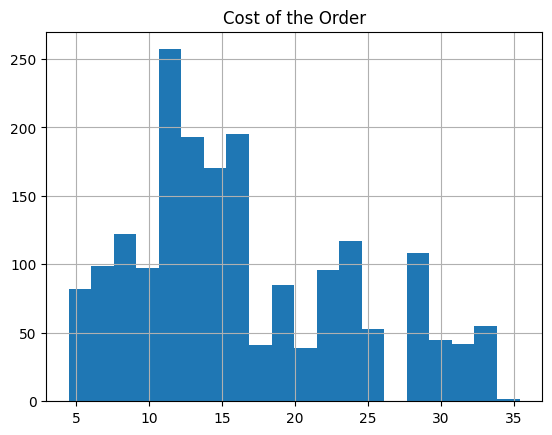

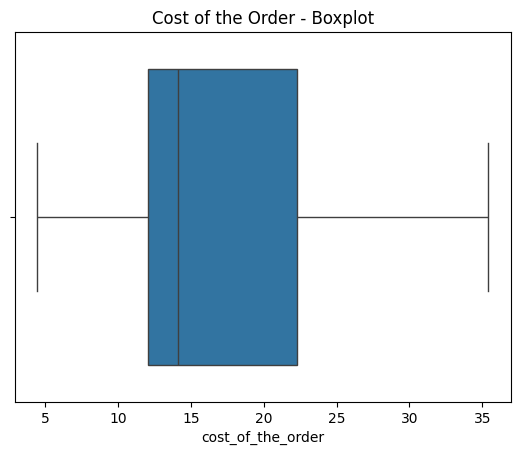

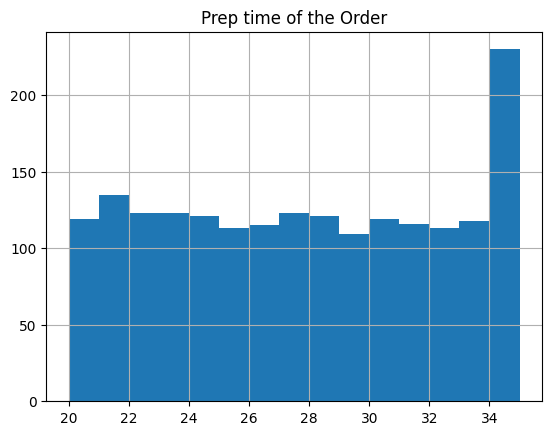

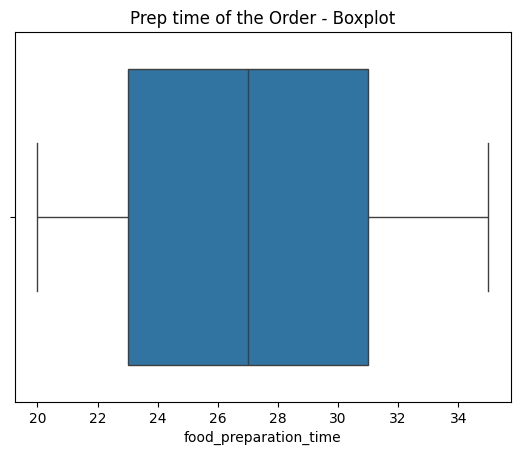

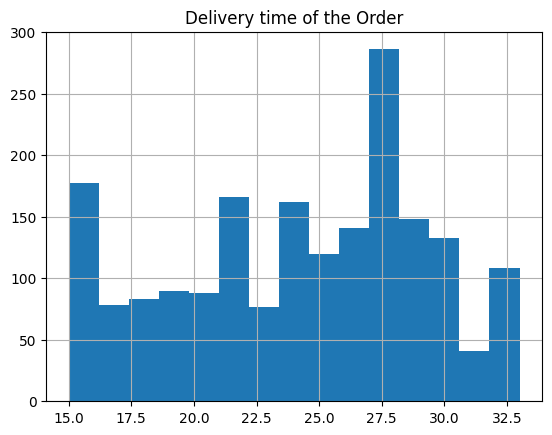

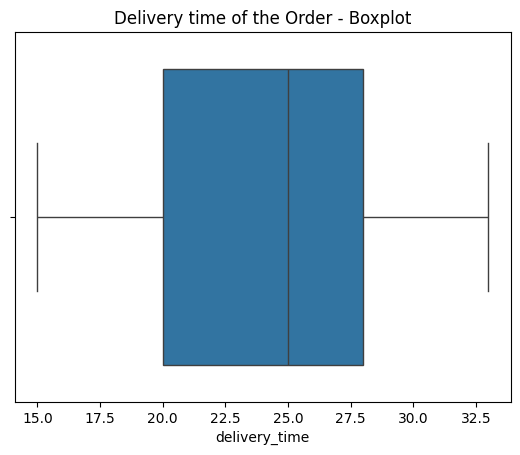

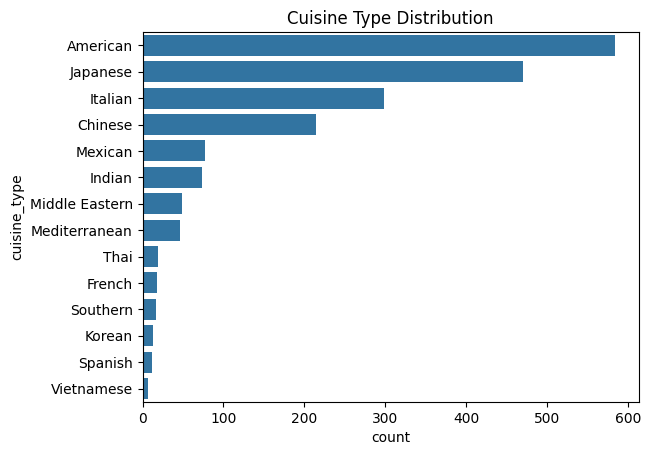

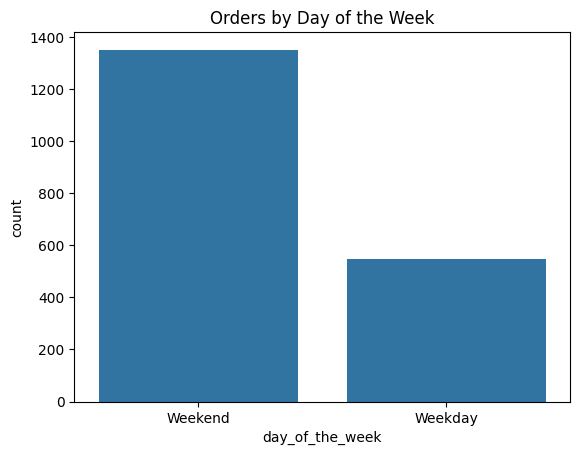

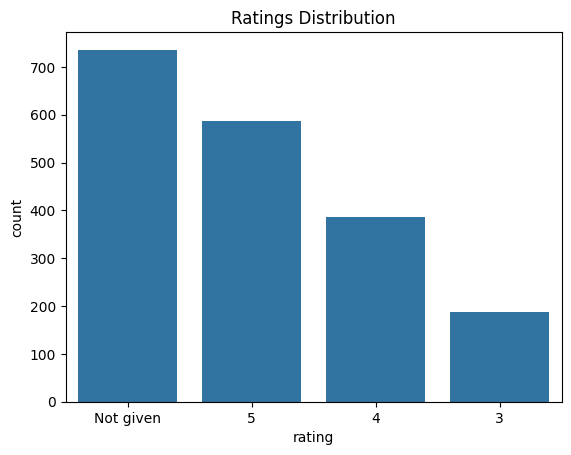

restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: count, dtype: int64
Unique orders: 1898
Unique customers: 1200


In [ ]:
# Write the code here
# cost_of_the_order
# Histogram
df['cost_of_the_order'].hist(bins=20)
plt.title("Cost of the Order")
plt.show()

# Boxplot
sns.boxplot(x=df['cost_of_the_order'])
plt.title("Cost of the Order - Boxplot")
plt.show()

# Observation:
# 1. Most of the order costs are in the range of 10-15
# 2. Values are ranging from around 5 to 35 and there are fewer
#    orders as the cost keeps increasing

# food_preparation_time
# Histogram
df['food_preparation_time'].hist(bins=15)
plt.title("Prep time of the Order")
plt.show()

# Boxplot
sns.boxplot(x=df['food_preparation_time'])
plt.title("Prep time of the Order - Boxplot")
plt.show()

# Observation:
# 1. Prep times are in the range of 20-35 and the orders are almost
# equally distributed across the prep times.
# 2. There are a lot of orders at the max value of 35 though which
# kind of indicates that the prep time was probably capped at 35 meaning
# prep times higher than 35 were also given 35 as the number

# delivery_time
# Histogram
df['delivery_time'].hist(bins=15)
plt.title("Delivery time of the Order")
plt.show()

# Boxplot
sns.boxplot(x=df['delivery_time'])
plt.title("Delivery time of the Order - Boxplot")
plt.show()

# Observation:
# 1. Delivery times are ranging from 15 to 32.5 with very much distributed
# 2. There are more orders which took near 27.5 minutes though
# 3. Also, there are more orders near the limits of 15 and 32.5 which kind of
# indicates this data was also mostly capped near the limits

# Cuisine type
sns.countplot(y=df['cuisine_type'], order=df['cuisine_type'].value_counts().index)
plt.title("Cuisine Type Distribution")
plt.show()

# Obvervation:
# 1. There are 14 different cuisines
# 2. Lot of orders were of american cuisine and lowest were Vietnamese

# day_of_the_week
sns.countplot(x=df['day_of_the_week'], order=df['day_of_the_week'].value_counts().index)
plt.title("Orders by Day of the Week")
plt.show()

# Observation:
# Orders on the weekend were double that of on the weekday

# rating
sns.countplot(x=df['rating'], order=df['rating'].value_counts().index)
plt.title("Ratings Distribution")
plt.show()

# Observation:
# 1. Looks like many customers skip giving rating and that is the most common
# 2. Customers who give rating give mostly a 5 rating to the restaurant

# restaurant_name
print(df['restaurant_name'].value_counts().head(10))

# Observation
# 1. There were around 178 restaurants and count plot was not giving any useful info
# 2. Shake Shack was the most commonly ordered restaurant

# Ids
print("Unique orders:", df['order_id'].nunique())
print("Unique customers:", df['customer_id'].nunique())

# Observation:
# IDs do not give us any useful distributions but are helpful in identifying
# the number of orders and customers.
# Unique orders: 1898
# Unique customers: 1200

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
# top 5 restaurants in terms of the number of orders received
top_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
# Filter only weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Look at the values by using counts
print(weekend_orders['cuisine_type'].value_counts())

# Get the max count cuisine
popular_cuisine = weekend_orders['cuisine_type'].value_counts().idxmax()

print("Most popular cuisine on weekends:", popular_cuisine)




cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Middle Eastern     32
Mediterranean      32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64
Most popular cuisine on weekends: American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
# Total number of orders
total_orders = len(df)

# Number of orders costing more than 20
expensive_orders = len(df[df['cost_of_the_order'] > 20])

# Percentage
percentage = (expensive_orders / total_orders) * 100

print("Percentage of orders costing more than $20:", percentage)

Percentage of orders costing more than $20: 29.24130663856691


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
mean_delivery = df['delivery_time'].mean()
print("Mean order delivery time:", mean_delivery)

Mean order delivery time: 24.161749209694417


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# Count how many orders each customer placed
top_customers = df['customer_id'].value_counts().head(3)

print("Top 3 customers with thier orders:")
print(top_customers)

Top 3 customers with thier orders:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


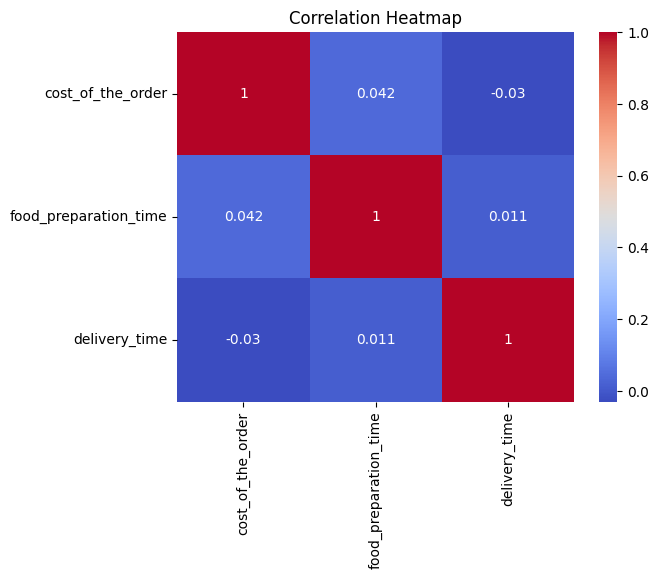

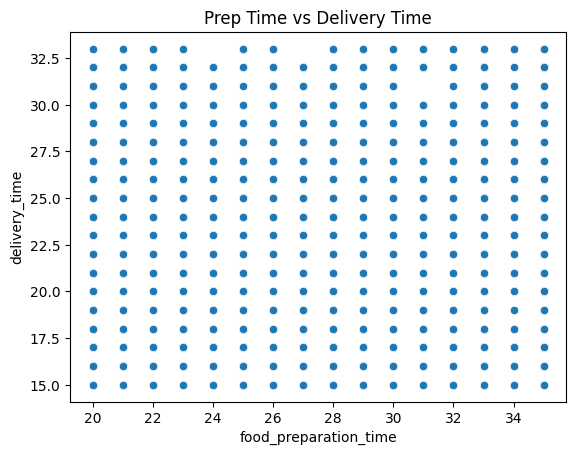

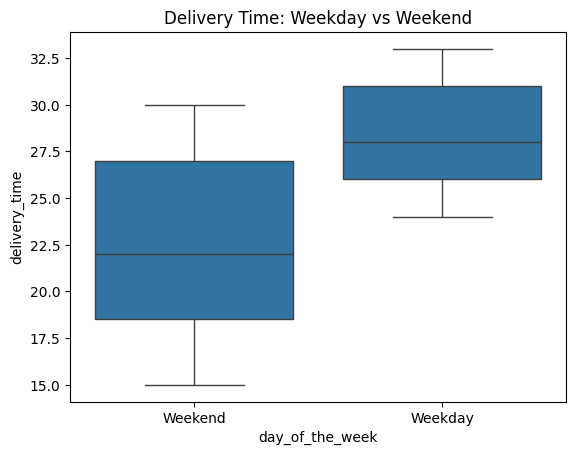

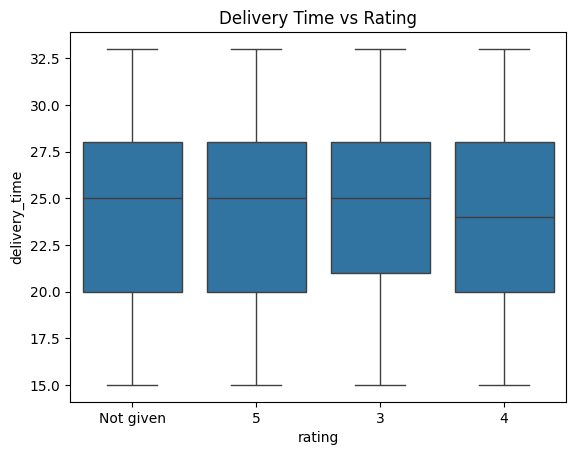

cuisine_type     American  Chinese  French  Indian  Italian  Japanese  Korean  \
day_of_the_week                                                                 
Weekday               169       52       5      24       91       135       2   
Weekend               415      163      13      49      207       335      11   

cuisine_type     Mediterranean  Mexican  Middle Eastern  Southern  Spanish  \
day_of_the_week                                                              
Weekday                     14       24              17         6        1   
Weekend                     32       53              32        11       11   

cuisine_type     Thai  Vietnamese  
day_of_the_week                    
Weekday             4           3  
Weekend            15           4  


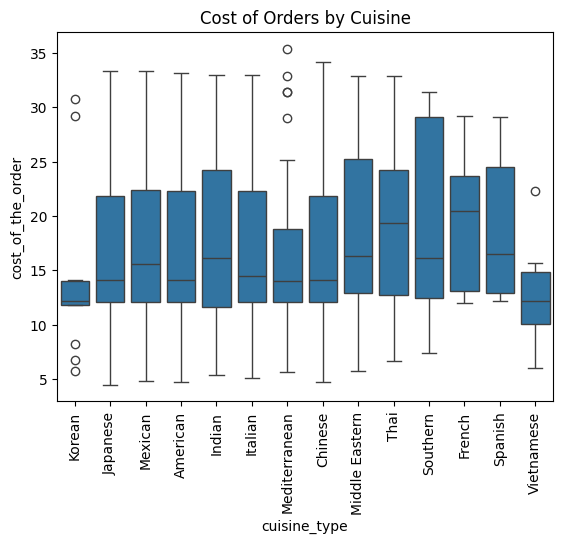

In [13]:
# Write the code here

# Exploring relationship between numeric variables here using heatmap.
num_cols = ['cost_of_the_order','food_preparation_time','delivery_time']
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Observation: Looks like there is no good correlation between the numeric
#              variables.

# Visualizing Prep Time vs Delivery Time using scatter plot even though there
# is no correlation
sns.scatterplot(x="food_preparation_time", y="delivery_time", data=df)
plt.title("Prep Time vs Delivery Time")
plt.show()

# Obervation: The scatter plot also shows the same behavior that there is no
#.            correlation

# Delivery Time: Weekday vs Weekend
sns.boxplot(x="day_of_the_week", y="delivery_time", data=df)
plt.title("Delivery Time: Weekday vs Weekend")
plt.show()

# Obervation
# 1. Looks like weekday delivery times are higher and the range is smaller which
#.   means it is more predictable
# 2. Weekend deliveries are faster, probably because of higher number of staff
#.   being available but the delivery times vary in a higher range

# Finding correlation between delivery time and rating
sns.boxplot(x="rating", y="delivery_time", data=df)
plt.title("Delivery Time vs Rating")
plt.show()

# Observation: I expected a correlation as people might give bad rating with
# higher delivery times but looks like there is no correlation

# Finding correlation between cuisine type and day of the week
# Frequency table
ct = pd.crosstab(df['day_of_the_week'], df['cuisine_type'])
print(ct)

# Observation: Orders on weekends are roughly three times higher than on
# weekdays across all cuisines

# Cost of Orders vs Cuisine Type
sns.boxplot(x="cuisine_type", y="cost_of_the_order", data=df)
plt.xticks(rotation=90)
plt.title("Cost of Orders by Cuisine")
plt.show()

# Observation:
# Southern cuisine is on the highest side and Vietnamese is the lowest on the cost



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [10]:
# Write the code here
# Ratings have Not given. So, we will replace it with NaN to not consider those
df['rating'] = df['rating'].replace("Not given", np.nan)

# Convert ratings into numbers (like 3, 4, 5)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant_name and calculate stats
restaurant_stats = df.groupby('restaurant_name')['rating'].agg(
    rating_count='count',     # number of ratings
    avg_rating='mean'         # average rating
).reset_index()

print(restaurant_stats.head())   # just to see what it looks like

# Find the eligible restaruants based on the requirement
eligible_restaurants = restaurant_stats[
    (restaurant_stats['rating_count'] > 50) &
    (restaurant_stats['avg_rating'] > 4)
]

print("Restaurants eligible for promotional offer:")
print(eligible_restaurants)

   restaurant_name  rating_count  avg_rating
0       'wichcraft             1         5.0
1        12 Chairs             2         4.5
2  5 Napkin Burger             2         4.0
3        67 Burger             1         5.0
4          Alidoro             0         NaN
Restaurants eligible for promotional offer:
               restaurant_name  rating_count  avg_rating
20   Blue Ribbon Fried Chicken            64    4.328125
21           Blue Ribbon Sushi            73    4.219178
136                Shake Shack           133    4.278195
153          The Meatball Shop            84    4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [6]:
# Write the code here
def calc_revenue(cost):
    if cost > 20:
        return cost * 0.25   # 25% commission
    elif cost > 5:
        return cost * 0.15   # 15% commission
    else:
        return 0

# Apply function row by row
df['company_revenue'] = df['cost_of_the_order'].apply(calc_revenue)

# Total net revenue
total_revenue = df['company_revenue'].sum()

print("Net revenue generated by the company: $", total_revenue)

Net revenue generated by the company: $ 6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [8]:
# Write the code here
# Calculate the total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count orders taking more than 60 minutes
orders_over_60 = len(df[df['total_time'] > 60])

# Total orders
total_orders = len(df)

# Percentage
percentage_over_60 = (orders_over_60 / total_orders) * 100

print("Percentage of orders taking more than 60 minutes:", percentage_over_60)

Percentage of orders taking more than 60 minutes: 10.537407797681771


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [7]:
# Write the code here
# Mean delivery time grouped by day type
mean_delivery = df.groupby('day_of_the_week')['delivery_time'].mean()

print(mean_delivery)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---